# Modified SEIR epidemic model integrated with healthcare resource consumption

In [180]:
#importing modules
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint

In [220]:
#defining the differential equations
##S is substituted for N minus all other individuals
##y is the variable list 0:E, 1:I1, 2:I2, 3:I3, 4:D, 5:R, 6:H1, 7:H2, 8:H3, 9:H4, 10:P1, 11:P2, 12:P3, 13:P4, 14:P5
def modSEIR(y,t,N,k):
    #assignments
    S=N-sum(y[0:9])
    P5=k[39]-sum(y[10:14])
    dy=[0]*14
    
    
    #reaction rates
    v0=k[0]*(y[5]/N)
    v1=k[1]*(S/N)*(y[1]/N)
    v2=k[2]*(S/N)*(y[2]/N)
    v3=k[3]*(S/N)*(y[3]/N)
    v4=k[4]*(y[0]/N)
    v5=k[5]*(y[1]/N)
    v6=k[6]*(y[2]/N)
    v7=k[7]*(y[3]/N)
    v8=k[8]*(y[1]/N)
    v9=k[9]*(y[2]/N)
    v10=k[10]*(y[3]/N)
    v11=k[11]*(y[1]/N)*(y[12])
    v12=k[12]*(y[1]/N)*(y[12])
    v13=k[13]*(y[1]/N)*(y[12])
    v14=k[14]*(y[1]/N)*(y[12])
    v15=k[15]*(y[2]/N)*(y[12])
    v16=k[16]*(y[2]/N)*(y[12])
    v17=k[17]*(y[2]/N)*(y[12])
    v18=k[18]*(y[2]/N)*(y[12])
    v19=k[19]*(y[3]/N)*(y[12])
    v20=k[20]*(y[3]/N)*(y[12])
    v21=k[21]*(y[3]/N)*(y[12])
    v22=k[22]*(y[3]/N)*(y[12])
    v23=k[23]*(y[10])
    v24=k[24]*(y[11])
    v25=k[25]*(y[12])
    v26=k[26]*(y[12])
    v27=k[27]*(y[6]/N)*(y[1]/N)
    v28=k[28]*(y[7]/N)*(y[1]/N)
    v29=k[29]*(y[8]/N)*(y[1]/N)
    v30=k[30]*(y[9]/N)*(y[1]/N)
    v31=k[31]*(y[6]/N)*(y[2]/N)
    v32=k[32]*(y[7]/N)*(y[2]/N)
    v33=k[33]*(y[8]/N)*(y[2]/N)
    v34=k[34]*(y[9]/N)*(y[2]/N)
    v35=k[35]*(y[6]/N)*(y[3]/N)
    v36=k[36]*(y[7]/N)*(y[3]/N)
    v37=k[37]*(y[8]/N)*(y[3]/N)
    v38=k[38]*(y[9]/N)*(y[3]/N)
    v39=k[39]
    
    #ODEs
    dy[0]=N*(v1+v2+v3+v27+v28+v29+v30+v31+v32+v33+v34+v35+v36+v37+v38-v4) #E
    dy[1]=N*(v4-v5-v8) #I1
    dy[2]=N*(v5-v6-v9) #I2
    dy[3]=N*(v6-v7-v10) #I3
    dy[4]=N*v7 #D
    dy[5]=N*(v8+v9+v10-v0) #R
    dy[6]=N*(-v11-v15-v19-v27-v31-v35) #H1
    dy[7]=N*(-v12-v16-v20-v28-v32-v36) #H2
    dy[8]=N*(-v13-v17-v21-v29-v33-v37) #H3
    dy[9]=N*(-v14-v18-v22-v30-v34-v38) #H4
    dy[10]=N*(v39-v23) #P1
    dy[11]=N*(v23-v24) #P2
    dy[12]=N*(v24-v25-v26-v11-v12-v13-v14-v15-v16-v17-v18-v19-v20-v21-v22) #P3
    dy[13]=N*(v25) #P4
#    dy[14]=N*(v26) #P5

    return dy

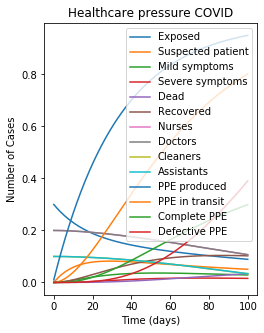

In [250]:
#parameters
##default parameters
k=0.03*np.ones(40) #set all parameters to 0.01
#k=[0.005,0.001,0.001,0.001,0.07,0.16,0.025,0.04,0.04,0.075,0.06,0.001,0.001,0.001,0.001,
#   0.005,0.003,0.002,0.002,0.007,0.005,0.003,0.003,0.009,0.009,0.001,0.001,0.003,0.003,0.001,0.001,
#   0.006,0.005,0.003,0.002,0.007,0.005,0.004,0.003,0.1]

N=1 #population count
##Initial conditions
ic=np.zeros(14)
ic[0]=0.3 #number of infected on day 0
ic[6]=0.2 #number of nurses
ic[7]=0.2 #number of doctors
ic[8]=0.1 #number of cleaners
ic[9]=0.1 #number of assistants
ic[10]=0.01 #number of manufactured PPEs
##timeline
tmax=100 # number of days
tvec=np.arange(0,tmax,0.1)
len(k)

#solving equations
soln=odeint(modSEIR,ic,tvec,args=(N,k))
#plotting solution
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
plt.plot(tvec,soln)
#plt.plot(tvec,[i[12] for i in soln])
legend_labels = ("Exposed","Suspected patient","Mild symptoms","Severe symptoms","Dead","Recovered","Nurses","Doctors","Cleaners","Assistants","PPE produced","PPE in transit","Complete PPE","Defective PPE")
plt.xlabel("Time (days)")
plt.title("Healthcare pressure COVID")
plt.ylabel("Number of Cases")
plt.legend(legend_labels)
#plt.ylim([0,20])

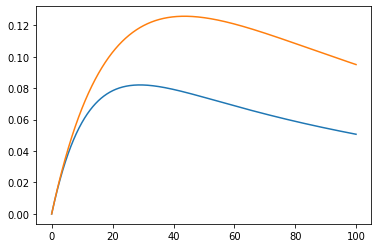

In [254]:
plt.plot(tvec,[i[1] for i in soln])
plt.plot(tvec,[i[1]+i[2]+i[3] for i in soln])